# Prediction of Diabetes using AI Classification Algorithms

Study Objective

Based on World Health Organization statistics, the global prevalence of diabetes among adults over 18 years of age rose from 4.7% in 1980 to 8.5% in 2014.Diabetes is considered as one of the deadliest chronic diseases which causes a surge in blood sugar when the pancreas does not produce sufficient insulin or when the body cannot effectively utilise the insulin its produces. Diabetes is a major cause of blindness, kidney failure, heart attacks, stroke and lower limb amputation. In 2016, an estimated 1.6 million deaths were directly caused by diabetes. Another 2.2 million deaths were attributable to high blood glucose in 2012.The goal of the study is to design several classifier models namely logistic regression, Xgboost, SVC and random forest to detect diabetes. The performances of all the three algorithms are evaluated on various measures like Precision, Accuracy,
F-Measure, and Recall. The performances of all the algorithms are evaluated on various measures like Precision, Accuracy,F-Measure, and Recall. 

In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
%matplotlib inline


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
import pickle
from lightgbm import LGBMClassifier
print('Library Loaded')


Library Loaded


In [4]:
df= pd.read_csv("diabetes.csv")
df.shape

(768, 9)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Data interpretation: Our target variable is Outcome where 1 means positive for diabetes, where 0 means negative.

In [6]:
#checking if there is any null record
#However there is some discrepancies with the insulin values where it is wrong to have zero insulin or skin thickness levels
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

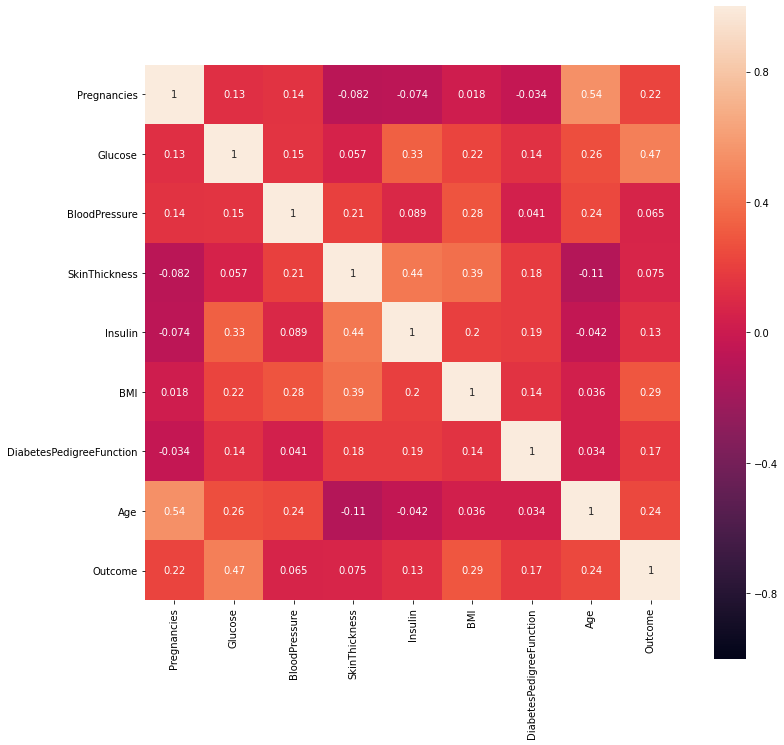

In [7]:
# Correlation matrix
corrmat = df.corr()
fig = plt.figure(figsize = (12, 12))

sns.heatmap(corrmat, vmax = 1, square = True,annot=True,vmin=-1)
plt.show()

Data interpretation: There is no high correlation between the independent variables.

C:\Users\Hwahwa\Anaconda3\envs\PythonCPU\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Hwahwa\Anaconda3\envs\PythonCPU\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Hwahwa\Anaconda3\envs\PythonCPU\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Hwahwa\A

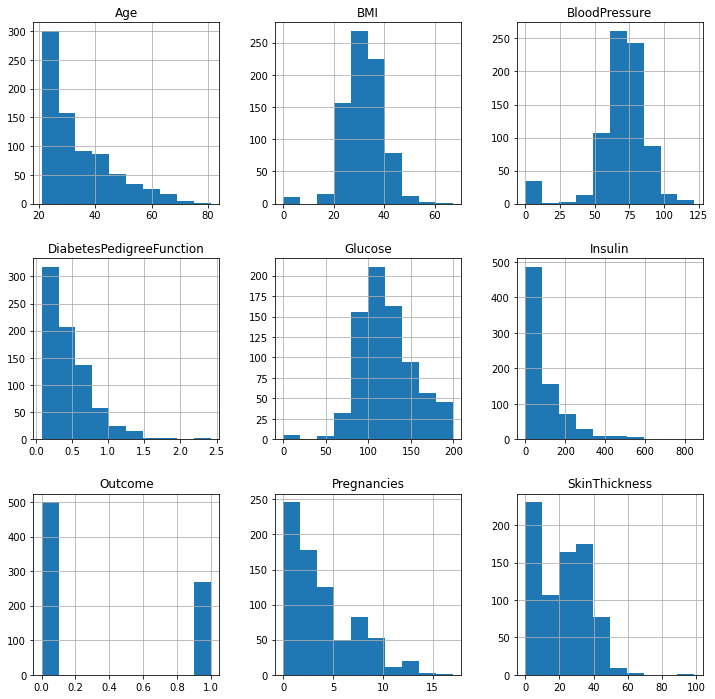

In [8]:
df.hist(figsize=(12,12))
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Data interpretation:There is no categorical features. All the features are numeric.

# Feature Engineering

In [14]:
#check if the data is balanced

df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Data interpretation: Data is unbalanced. There are much more cases of non-diabetics cases (500) than the diabetic (260) cases.

In [15]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
print("# rows in dataframe {0}".format(len(df)))
print("-------------------------------------------")
print("# rows missing Glucose: {0}".format(len(df.loc[df.Glucose == 0 ])))
print("# rows missing BloodPressure: {0}".format(len(df.loc[df.BloodPressure == 0 ])))
print("# rows missing SkinThickness: {0}".format(len(df.loc[df.SkinThickness == 0 ])))
print("# rows missing insulin: {0}".format(len(df.loc[df.Insulin == 0 ])))
print("# rows missing bmi: {0}".format(len(df.loc[df.BMI == 0 ])))
print("# rows missing Age: {0}".format(len(df.loc[df.Age == 0 ])))
print("# rows missing Pregnancies: {0}".format(len(df.loc[df.Pregnancies == 0 ])))
print("# rows missing DiabetesPedigreeFunction: {0}".format(len(df.loc[df.DiabetesPedigreeFunction == 0 ])))

# rows in dataframe 768
-------------------------------------------
# rows missing Glucose: 5
# rows missing BloodPressure: 35
# rows missing SkinThickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing Age: 0
# rows missing Pregnancies: 111
# rows missing DiabetesPedigreeFunction: 0


Data interpretation: The zero values in glucose, blood pressure, skin thickness, insulin and bmi does not make sense.

In [17]:
X = df.drop('Outcome',axis=1) # predictor feature coloumns
y = df.Outcome


X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

print('Training Set :',len(X_train))
print('Test Set :',len(X_test))
print('Training labels :',len(y_train))
print('Test Labels :',len(y_test))

Training Set : 614
Test Set : 154
Training labels : 614
Test Labels : 154


In [22]:
#imputing all the null values with the mean values
from sklearn.impute import SimpleImputer

fill = SimpleImputer(missing_values = 0 , strategy ="mean")

X_train = fill.fit_transform(X_train)
X_test = fill.fit_transform(X_test)


# Model Building and Evaluation

In [23]:
print('Training Set :',len(X_train))
print('Test Set :',len(X_test))
print('Training labels :',len(y_train))
print('Test Labels :',len(y_test))

Training Set : 614
Test Set : 154
Training labels : 614
Test Labels : 154


In [24]:
def FitModel(X_train,y_train,X_test,y_test,algo_name,algorithm,gridSearchParams,cv):
    np.random.seed(10)
   
    
    grid = GridSearchCV(
        estimator=algorithm,
        param_grid=gridSearchParams,
        cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
    
    
    grid_result = grid.fit(X_train, y_train)
    best_params = grid_result.best_params_
    pred = grid_result.predict(X_test)
    cm = confusion_matrix(y_test, pred)
   # metrics =grid_result.gr
    print(pred)
    #pickle.dump(grid_result,open(algo_name,'wb'))
   
    print('Best Params :',best_params)
    print('Classification Report :',classification_report(y_test,pred))
    print('Accuracy Score : ' + str(accuracy_score(y_test,pred)))
    print('Confusion Matrix : \n', cm)

# Logistic Regression

In [25]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

FitModel(X_train,y_train,X_test,y_test,'LogisticRegression',LogisticRegression(),hyperparameters,cv=5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


[1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1
 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1
 1 0 0 0 1 0]
Best Params : {'C': 7.742636826811269, 'penalty': 'l2'}
Classification Report :               precision    recall  f1-score   support

           0       0.73      0.86      0.79        95
           1       0.69      0.49      0.57        59

    accuracy                           0.72       154
   macro avg       0.71      0.68      0.68       154
weighted avg       0.72      0.72      0.71       154

Accuracy Score : 0.7207792207792207
Confusion Matrix : 
 [[82 13]
 [30 29]]


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.1s finished
C:\Users\Hwahwa\Anaconda3\envs\PythonCPU\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# XgBoost

In [26]:
param ={
            'n_estimators': [100, 500, 1000,1500, 2000],
            'max_depth' :[2,3,4,5,6,7],
    'learning_rate':np.arange(0.01,0.1,0.01).tolist()
           
        }

FitModel(X_train,y_train,X_test,y_test,'XGBoost',XGBClassifier(),param,cv=5)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:   48.7s


[1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0
 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1
 1 0 0 0 1 0]
Best Params : {'learning_rate': 0.060000000000000005, 'max_depth': 2, 'n_estimators': 100}
Classification Report :               precision    recall  f1-score   support

           0       0.75      0.87      0.81        95
           1       0.73      0.54      0.62        59

    accuracy                           0.75       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154

Accuracy Score : 0.7467532467532467
Confusion Matrix : 
 [[83 12]
 [27 32]]


[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:   54.0s finished


# Random Forest

In [27]:
param ={
            'n_estimators': [100, 500, 1000,1500, 2000],
           
        }
FitModel(X_train,y_train,X_test,y_test,'Random Forest',RandomForestClassifier(),param,cv=5)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:    3.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    4.1s finished


[1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0
 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 1 0 0 0 1 0]
Best Params : {'n_estimators': 1000}
Classification Report :               precision    recall  f1-score   support

           0       0.75      0.86      0.80        95
           1       0.70      0.53      0.60        59

    accuracy                           0.73       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.73      0.73      0.72       154

Accuracy Score : 0.7337662337662337
Confusion Matrix : 
 [[82 13]
 [28 31]]


# SVC

In [28]:
param ={
            'C': [0.1, 1, 100, 1000],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        }
FitModel(X_train,y_train,X_test,y_test,'SVC',SVC(),param,cv=5)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s


[1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0
 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1
 1 0 0 0 0 0]
Best Params : {'C': 1, 'gamma': 0.0001}
Classification Report :               precision    recall  f1-score   support

           0       0.71      0.91      0.80        95
           1       0.73      0.41      0.52        59

    accuracy                           0.71       154
   macro avg       0.72      0.66      0.66       154
weighted avg       0.72      0.71      0.69       154

Accuracy Score : 0.7142857142857143
Confusion Matrix : 
 [[86  9]
 [35 24]]


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.2s finished


Data interpretation: Though the accuracy is fairly high, however with the unbalance data set. There is large difference in the precision and recall score between the majority class(0) and the minority class(1). We could further improve the model by performing balancing of dataset.

# Balancing the Dataset - Over Sampling

In [29]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [30]:
from imblearn.over_sampling import SMOTE
sm =SMOTE(random_state=42)
X_res_OS , Y_res_OS = sm.fit_resample(X,y)
pd.Series(Y_res_OS).value_counts()

Using TensorFlow backend.


1    500
0    500
Name: Outcome, dtype: int64

In [31]:

X_train , X_test , y_train , y_test = train_test_split(X_res_OS, Y_res_OS, test_size = 0.20, random_state = 10)

print('Training Set :',len(X_train))
print('Test Set :',len(X_test))
print('Training labels :',len(y_train))
print('Test Labels :',len(y_test))

Training Set : 800
Test Set : 200
Training labels : 800
Test Labels : 200


In [34]:
fill = SimpleImputer(missing_values = 0 , strategy ="mean")

X_train = fill.fit_transform(X_train)
X_test = fill.fit_transform(X_test)

In [35]:
print('Training Set :',len(X_train))
print('Test Set :',len(X_test))
print('Training labels :',len(y_train))
print('Test Labels :',len(y_test))

Training Set : 800
Test Set : 200
Training labels : 800
Test Labels : 200


# Logistic Regression - After Over sampling

In [36]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

FitModel(X_train,y_train,X_test,y_test,'LogisticRegression',LogisticRegression(),hyperparameters,cv=5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0
 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1
 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0
 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0
 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1
 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0]
Best Params : {'C': 1291.5496650148827, 'penalty': 'l2'}
Classification Report :               precision    recall  f1-score   support

           0       0.69      0.75      0.72        93
           1       0.77      0.71      0.74       107

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200

Accuracy Score : 0.73
Confusion Matrix : 
 [[70 23]
 [31 76]]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
C:\Users\Hwahwa\Anaconda3\envs\PythonCPU\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# XgBoost - After Over sampling

In [37]:
param ={
            'n_estimators': [100, 500, 1000,1500, 2000],
            'max_depth' :[2,3,4,5,6,7],
    'learning_rate':np.arange(0.01,0.1,0.01).tolist()
           
        }

FitModel(X_train,y_train,X_test,y_test,'XGBoost',XGBClassifier(),param,cv=5)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 466 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 816 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 1266 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  1.1min finished


[1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1
 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0
 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0
 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0]
Best Params : {'learning_rate': 0.02, 'max_depth': 7, 'n_estimators': 1000}
Classification Report :               precision    recall  f1-score   support

           0       0.81      0.75      0.78        93
           1       0.80      0.85      0.82       107

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200

Accuracy Score : 0.805
Confusion Matrix : 
 [[70 23]
 [16 91]]


# Random Forest - After Over sampling

In [38]:
param ={
            'n_estimators': [100, 500, 1000,1500, 2000],
           
        }
FitModel(X_train,y_train,X_test,y_test,'Random Forest',RandomForestClassifier(),param,cv=5)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:    3.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    4.7s finished


[1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1
 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0
 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0
 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0]
Best Params : {'n_estimators': 2000}
Classification Report :               precision    recall  f1-score   support

           0       0.84      0.80      0.82        93
           1       0.83      0.87      0.85       107

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.83       200
weighted avg       0.84      0.83      0.83       200

Accuracy Score : 0.835
Confusion Matrix : 
 [[74 19]
 [14 93]]


# SVC - After Over sampling

In [39]:
param ={
            'C': [0.1, 1, 100, 1000],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        }
FitModel(X_train,y_train,X_test,y_test,'SVC',SVC(),param,cv=5)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s


[1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0
 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1
 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0
 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0
 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1
 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0]
Best Params : {'C': 1000, 'gamma': 0.005}
Classification Report :               precision    recall  f1-score   support

           0       0.69      0.81      0.75        93
           1       0.80      0.69      0.74       107

    accuracy                           0.74       200
   macro avg       0.75      0.75      0.74       200
weighted avg       0.75      0.74      0.74       200

Accuracy Score : 0.745
Confusion Matrix : 
 [[75 18]
 [33 74]]


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.3s finished


Conclusion: Results obtained show that the Random Forest Model outperforms the rest with the highest accuracy of 83.5%  when compared to other algorithms.